In [1]:
import numpy as np
import keras
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Dropout, Flatten, Concatenate
from keras.models import Sequential, Model, load_model

from PIL import Image
from skimage.transform import resize
import tensorflow as tf

Using TensorFlow backend.


In [2]:
with tf.device('/gpu:1'):
    model = load_model('model/model_2_1.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.




In [3]:
test_input = []

In [4]:
for i in range(0, 311):
    path = 'Image_310/%s/W225.bmp'%str(i).zfill(4)
    img = np.array(Image.open(path))
    img = (255 - img)/255
    img = resize(img,((480,480)), mode='reflect')
    test_input.append([img])

In [5]:
test_input = np.reshape(test_input,(-1,480,480,1))

In [6]:
print(test_input.shape)

(311, 480, 480, 1)


In [7]:
import time
start = time.time()
with tf.device('/gpu:1'):
    result = model.predict(test_input)
end = time.time()
print('time: ', end - start)

time:  2.0116162300109863


In [8]:
labels = np.argmax(result, axis=1)

In [9]:
true_label = np.zeros(311)
true_label[1:] = 1

check_label = np.zeros(311)

In [10]:
for i in range(labels.shape[0]):
    if labels[i] == 1:
        print('%s : mura' %str(i).zfill(4)) 
        check_label[i] = 1
    else:
        print('%s : normal'  %str(i).zfill(4))
        check_label[i] = 0

0000 : normal
0001 : mura
0002 : mura
0003 : mura
0004 : mura
0005 : mura
0006 : mura
0007 : mura
0008 : mura
0009 : mura
0010 : mura
0011 : mura
0012 : mura
0013 : mura
0014 : mura
0015 : mura
0016 : mura
0017 : mura
0018 : mura
0019 : mura
0020 : mura
0021 : mura
0022 : mura
0023 : mura
0024 : mura
0025 : mura
0026 : mura
0027 : mura
0028 : mura
0029 : mura
0030 : mura
0031 : mura
0032 : mura
0033 : mura
0034 : mura
0035 : mura
0036 : mura
0037 : mura
0038 : mura
0039 : mura
0040 : mura
0041 : mura
0042 : mura
0043 : mura
0044 : mura
0045 : mura
0046 : mura
0047 : mura
0048 : mura
0049 : mura
0050 : mura
0051 : mura
0052 : mura
0053 : mura
0054 : mura
0055 : mura
0056 : mura
0057 : mura
0058 : mura
0059 : mura
0060 : mura
0061 : mura
0062 : mura
0063 : mura
0064 : mura
0065 : mura
0066 : mura
0067 : mura
0068 : mura
0069 : mura
0070 : mura
0071 : mura
0072 : mura
0073 : mura
0074 : mura
0075 : mura
0076 : mura
0077 : mura
0078 : mura
0079 : mura
0080 : mura
0081 : mura
0082 : mura
00

In [11]:
error = ((true_label + check_label) % 2).sum()
accuracy = (true_label.shape[0]-error)/true_label.shape[0]
print('accuray : ', accuracy)

accuray :  1.0


In [40]:
path2 = 'Image_310/0001/W225.bmp'
img = np.array(Image.open(path2))
img = (255 - img)/255
img = resize(img,((480,480)), mode='reflect')

In [41]:
print(img)

[[0.84096147 0.77134621 0.76448159 ... 0.77091321 0.77419266 0.83337874]
 [0.82030199 0.74432497 0.73643869 ... 0.73244226 0.73926137 0.8050817 ]
 [0.82087546 0.74257288 0.73395403 ... 0.73192684 0.73586409 0.80170736]
 ...
 [0.82628873 0.74309877 0.7337336  ... 0.7319251  0.74267656 0.82481396]
 [0.82805667 0.74771645 0.73838202 ... 0.73485583 0.74567329 0.82832007]
 [0.86099724 0.79217463 0.78479458 ... 0.76656294 0.77243107 0.84629993]]


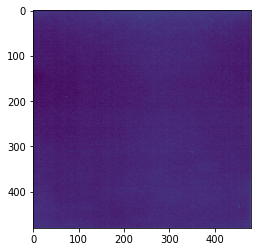

In [42]:
import matplotlib.pyplot as plt 
plt.imshow(img)